In [1]:
%load_ext autoreload
%autoreload 2

In [7]:
%%prun
from finance.data.eodhistoricaldata import get_tickers_from_exchange_mics

exchange_mics = ['XNYS']

tickers_df = get_tickers_from_exchange_mics(exchange_mics=exchange_mics)

tickers_df = tickers_df.loc[tickers_df['Type'] == 'Common Stock']

         126792 function calls (126632 primitive calls) in 0.196 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        6    0.069    0.012    0.069    0.012 decoder.py:343(raw_decode)
    52712    0.019    0.000    0.022    0.000 construction.py:958(<genexpr>)
        2    0.014    0.007    0.014    0.007 {pandas._libs.lib.dicts_to_array}
        1    0.011    0.011    0.157    0.157 eodhistoricaldata.py:76(get_tickers)
        2    0.010    0.005    0.033    0.016 {pandas._libs.lib.fast_unique_multiple_list_gen}
        1    0.010    0.010    0.192    0.192 eodhistoricaldata.py:94(get_tickers_from_exchange_mics)
        3    0.009    0.003    0.009    0.003 managers.py:2060(_stack_arrays)
        2    0.009    0.004    0.009    0.004 construction.py:965(<listcomp>)
        2    0.007    0.003    0.007    0.003 {pandas._libs.ops.scalar_compare}
    52724    0.003    0.000    0.003    0.000 {method 'keys' of 'dict' objects

In [3]:
# from finance.utils import requests_

# old_cache = requests_.create_requests_session(cache_path='../cache.old/yfinance').cache
# # len(list(old_cache.cache.keys()))
# new_cache = requests_.create_requests_session_from_cache_name("yfinance").cache

# new_cache.update(old_cache)


JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [2]:
from finance.utils import requests_

session = requests_.create_requests_session_from_cache_name(cache_name="yfinance")
print(len(list(session.cache.urls)))


88


In [4]:
%%timeit
import tqdm
from finance.data.yfinance_ import get_ticker_obj
ticker = "TSLA"
ticker_obj = get_ticker_obj(ticker=ticker)
market_cap = ticker_obj.get_info()['marketCap']
print(market_cap)

789035548672
789035548672
789035548672
789035548672
789035548672
789035548672
789035548672
789035548672
201 ms ± 8.32 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [16]:
import tqdm
from finance.data.yfinance_ import get_ticker_obj

market_caps = []
for ticker in tqdm.tqdm(tickers_df['Code'].iloc[:20]):
    try:
        ticker_obj = get_ticker_obj(ticker=ticker)
        market_cap = ticker_obj.get_info()['marketCap']
    except Exception as e:
        market_cap = e
    
    market_caps.append(market_cap)
    

100%|██████████| 20/20 [00:03<00:00,  5.67it/s]


In [27]:
market_caps_ = [None if isinstance(v, Exception) else v for v in market_caps]
tickers_df_ = tickers_df.copy()
tickers_df_["Market Cap"] = market_caps_


In [34]:
tickers_df_[
    tickers_df_["Market Cap"].notnull() & ~tickers_df_["Code"].duplicated(keep=False)
]  # .groupby('MIC').count()['Code']


,Code,Name,Country,Exchange,Currency,Type,Isin,MIC,Eodhistoricaldata Code,Market Cap
4,A,Agilent Technologies Inc,USA,NYSE,USD,Common Stock,US00846U1016,XNYS,US,3.674884e+10
5,AA,Alcoa Corporation,USA,NYSE,USD,Common Stock,US0138721065,XNYS,US,1.172911e+10
140,AAIC,Arlington Asset Investment Corp,USA,NYSE,USD,Common Stock,US0413562051,XNYS,US,1.074666e+08
186,AAN,Aaron’s Company Inc,USA,NYSE,USD,Common Stock,US00258W1080,XNYS,US,6.349044e+08
194,AAP,Advance Auto Parts Inc,USA,NYSE,USD,Common Stock,US00751Y1064,XNYS,US,1.327815e+10
...,...,...,...,...,...,...,...,...,...,...
931,ORIA,Fiducial Real Estate SA,France,PA,EUR,Common Stock,FR0000060535,XPAR,PA,2.447500e+08
1002,ROTH,Rothschild & Co SCA,France,PA,EUR,Common Stock,FR0000031684,XPAR,PA,3.010000e+02
1018,SBT,Oeneo SA,France,PA,EUR,Common Stock,FR0000052680,XPAR,PA,3.378236e+08
1030,SFPI,GROUPE SFPI SA,France,PA,EUR,Common Stock,FR0004155000,XPAR,PA,7.046000e+03


In [36]:
get_ticker_obj("ORIA").get_info()


{'zip': '10022',
 'sector': 'Financial Services',
 'longBusinessSummary': 'Orion Biotech Opportunities Corp., a blank check company, intends to effect a merger, share exchange, asset acquisition, share purchase, reorganization, or related business combination with one or more businesses or entities. The company was founded in 2021 and is based in New York, New York.',
 'city': 'New York',
 'phone': '213-303-1650',
 'state': 'NY',
 'country': 'United States',
 'companyOfficers': [],
 'website': 'https://orionbiotechopportunities.com',
 'maxAge': 1,
 'address1': '645 Fifth Avenue',
 'industry': 'Shell Companies',
 'address2': '21st Floor',
 'ebitdaMargins': 0,
 'profitMargins': 0,
 'grossMargins': 0,
 'operatingCashflow': -1332887,
 'revenueGrowth': None,
 'operatingMargins': 0,
 'ebitda': None,
 'targetLowPrice': None,
 'recommendationKey': 'none',
 'grossProfits': None,
 'freeCashflow': None,
 'targetMedianPrice': None,
 'currentPrice': 9.79,
 'earningsGrowth': None,
 'currentRatio': 1

In [25]:
import pandas as pd

with pd.option_context("display.max_rows", None):
    display(tickers_df.loc[tickers_df["Code"].duplicated(keep=False)].sort_values("Code"))


,Code,Name,Country,Exchange,Currency,Type,Isin,MIC,Eodhistoricaldata Code
50,AAC,Ares Acquisition Corporation,USA,NYSE,USD,Common Stock,KYG330321061,XNYS,US
8,AAC,Accor Acquisition Co.,France,PA,EUR,Common Stock,None,XPAR,PA
235,AB,AllianceBernstein Holding L.P,USA,NYSE,USD,Common Stock,US01881G1067,XNYS,US
11,AB,AB Science S.A,France,PA,EUR,Common Stock,FR0010557264,XPAR,PA
412,AC,Associated Capital Group Inc,USA,NYSE,USD,Common Stock,US0455281065,XNYS,US
19,AC,Accor S. A.,France,PA,EUR,Common Stock,FR0000120404,XPAR,PA
413,ACA,Arcosa Inc,USA,NYSE,USD,Common Stock,US0396531008,XNYS,US
20,ACA,Crédit Agricole S.A,France,PA,EUR,Common Stock,FR0000045072,XPAR,PA
1453,AI,C3.ai Inc,USA,NYSE,USD,Common Stock,US12468P1049,XNYS,US
43,AI,L'Air Liquide S.A,France,PA,EUR,Common Stock,FR0000120073,XPAR,PA


In [19]:
len(tickers_df["Code"].unique())


3318

In [7]:
exceptions = [e for e in market_caps if isinstance(e, Exception)]


In [15]:
tickers_df.iloc[i]["Code"]


'ADS'

In [17]:
get_ticker_obj("ADS").get_info()


Unable to deserialize response with key 2dc827c9d37a8085: Expecting value: line 1 column 1 (char 0)


TypeError: Object of type Response is not JSON serializable

In [14]:
for i in range(len(market_caps)):
    if isinstance(market_caps[i], Exception):
        break
print(i)


43


In [ ]:
tickers_df['market_cap'] = 

In [6]:
pd.to_datetime("2021-10-29 12:21:59.980553+0000")


NameError: name 'pd' is not defined

In [3]:
from finance.data import yfinance_

history = yfinance_.get_maximum_daily_ohlc_history_from_ticker(ticker="TSLA")


In [10]:
ticker.get_info()["marketCap"]


750454571008

In [8]:
from finance.data import yfinance_

ticker = yfinance_.get_ticker_obj("TSLA")
ticker.get_financials()


,2021-12-31,2020-12-31,2019-12-31,2018-12-31
Research Development,2593000000.0,1491000000.0,1343000000.0,1460000000.0
Effect Of Accounting Charges,None,None,None,None
Income Before Tax,6343000000.0,1154000000.0,-665000000.0,-1005000000.0
Minority Interest,1394000000.0,1454000000.0,1492000000.0,1390000000.0
Net Income,5519000000.0,721000000.0,-862000000.0,-976000000.0
Selling General Administrative,4517000000.0,3188000000.0,2646000000.0,2835000000.0
Gross Profit,13606000000.0,6630000000.0,4069000000.0,4042000000.0
Ebit,6523000000.0,1951000000.0,80000000.0,-253000000.0
Operating Income,6523000000.0,1951000000.0,80000000.0,-253000000.0
Other Operating Expenses,-27000000.0,-27000000.0,-27000000.0,-27000000.0


In [11]:
from finance.utils.file import read_json

cache_value = read_json("../cache/yfinance/59bb5bbf329b3c59.json")
# cache_value
cache_value["_content"].decode("utf-8")


AttributeError: 'str' object has no attribute 'decode'

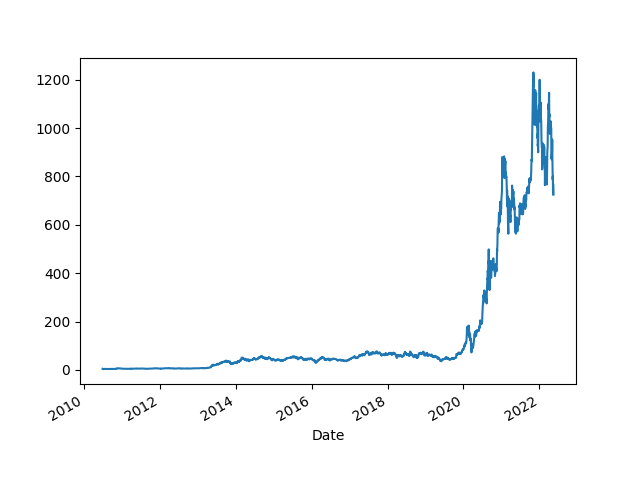

In [4]:
%matplotlib widget
from matplotlib import pyplot as plt
history['Close'].plot()
plt.show()

In [48]:
import urllib
from finance.utils.requests_ import create_requests_session

session = create_requests_session(cache_path="yahoo_finance_cache")
base_url = "https://query2.finance.yahoo.com"

ticker = "A"
autocomplete_url = urllib.parse.urljoin(base=base_url, url=f"v8/finance/chart/{ticker}")
# autocomplete_params = {"region": "US", "lang": "en", "query": "apple"}

# headers = {"x-api-key": credentials["api_key"]}
user_agent_headers = {
    "User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/39.0.2171.95 Safari/537.36"
}
output = session.get(url=autocomplete_url, headers=user_agent_headers)


In [41]:
history.loc[history["Stock Splits"].astype(bool)]


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1974-02-04,2.224824,2.224824,2.082054,2.088003,536663,0.0,1.500000
1981-02-23,4.015944,4.015944,3.968882,3.984570,92884,0.0,2.000000
1995-02-27,16.859381,16.859381,16.137573,16.292246,812484,0.0,2.000000
1999-02-26,36.375568,36.375568,35.166713,35.606297,758136,0.0,2.000000
2000-06-12,53.664166,53.664166,51.428162,51.651764,1409280,0.0,2.000000
2016-10-06,24.666022,25.420213,24.666022,25.229681,12517478,0.0,0.333333
2016-11-01,21.903706,23.340826,21.586548,22.795712,32216900,0.0,1.248439


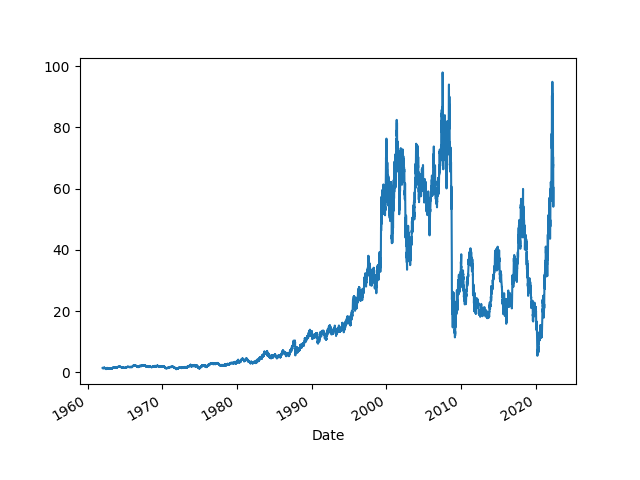

In [42]:
%matplotlib widget
from matplotlib import pyplot as plt
history['Close'].plot()
plt.show()

In [10]:
tickers_df


,Code,Name,Country,Exchange,Currency,Type,Isin,MIC,Eodhistoricaldata Code
4,A,Agilent Technologies Inc,USA,NYSE,USD,Common Stock,US00846U1016,XNYS,US
5,AA,Alcoa Corporation,USA,NYSE,USD,Common Stock,US0138721065,XNYS,US
50,AAC,Ares Acquisition Corporation,USA,NYSE,USD,Common Stock,KYG330321061,XNYS,US
140,AAIC,Arlington Asset Investment Corp,USA,NYSE,USD,Common Stock,US0413562051,XNYS,US
148,AAIN,AAIN,USA,NYSE,USD,Common Stock,None,XNYS,US
...,...,...,...,...,...,...,...,...,...
1141,WAGA,Waga Energy SA,France,PA,EUR,Common Stock,FR0012532810,XPAR,PA
1143,WAVE,Wavestone SA,France,PA,EUR,Common Stock,FR0013357621,XPAR,PA
1147,WLN,Worldline SA,France,PA,EUR,Common Stock,FR0011981968,XPAR,PA
1153,XFAB,X-FAB Silicon Foundries SE,France,PA,EUR,Common Stock,BE0974310428,XPAR,PA


In [4]:
import pandas as pd

with pd.option_context("display.max_rows", None):
    display(exchanges)


,Name,Code,OperatingMIC,Country,Currency
0,USA Stocks,US,"XNAS, XNYS",USA,USD
1,London Exchange,LSE,XLON,UK,GBP
2,Toronto Exchange,TO,XTSE,Canada,CAD
3,TSX Venture Exchange,V,XTSX,Canada,CAD
4,NEO Exchange,NEO,NEOE,Canada,CAD
5,Hamburg Exchange,HM,XHAM,Germany,EUR
6,Munich Exchange,MU,XMUN,Germany,EUR
7,XETRA Exchange,XETRA,XETR,Germany,EUR
8,Dusseldorf Exchange,DU,XDUS,Germany,EUR
9,Hanover Exchange,HA,XHAN,Germany,EUR


In [ ]:
base = "https://yfapi.net"
autocomplete_url = urllib.parse.urljoin(base=base, url="v6/finance/autocomplete")
autocomplete_params = {"region": "US", "lang": "en", "query": "apple"}

headers = {"x-api-key": credentials["api_key"]}

output = requests.get(url=autocomplete_url, params=autocomplete_params)


In [14]:
"""This is an simple example to help understand the pype execution model.

It uses a slightly different architecture to the functions in pype.pype
to make it easier to understand (fewer nested functions.)

This architecture allows for a total decoupling between:
- The input data generation
- The processing of each element of the input data stream (i.e step_processing_function)
- The final processing of the stream produces by the step_processing_function being applied to each element of the input_data_stream.

Typically, the processor_generator, output_data_stream_generator and main function would remain fixed but the end used
can have complete freedom to modify the input_data_stream, step_processing_function and output_processing_function.
"""
from __future__ import annotations
import time


def input_data_stream_generator():
    """This is a generator that only generates output values."""
    i = 0
    while True:
        yield f"input_data_{i}"


def step_processing_function(input_data: str):
    """Processing function applied to each element of the input_data_stream."""
    print(f"Processing: {input_data}")
    output_data = f"{input_data}_processed"
    time.sleep(1)
    return output_data


def output_processing_function(output_data_stream):
    """Final processing function applied to generator of output values."""
    for i, output_data in enumerate(output_data_stream):
        print(f"Final output: {output_data}")
        print()

        if i > 10:
            break


def processor_generator(step_processing_function: Callable[[str], str]):
    """This generator takes input (via its send method) and yields the step processed output.

    This function is the equivalent of pype.create_pype_processor_.
    """

    # Retrieve input
    input_data = yield

    while True:
        # do something with the input data
        output_data = step_processing_function(input_data=input_data)
        input_data = yield output_data


def output_data_stream_generator(input_data_stream: Generator[str, None, None], processor: Generator[str, str, None]):
    """Applies the processor to the input stream and yield the values.

    This function is similar to pype._run_pype (although it doesn't create the processor itself, it takes it as input.)
    """

    for input_data in input_data_stream:
        output = processor.send(input_data)
        yield output


def main(
    input_data_stream_generator: Generator[str, None, None],
    step_processing_function: Callable[[str], str],
    output_processing_function: Callable[[str], None],
) -> None:
    # Step 1: Create the input stream (e.g cloud data stream, ZMQ input stream etc...)
    input_data_stream = input_data_stream_generator()

    # Step 2: Create and initialise the processor so that it's ready to receive data.
    processor = processor_generator(step_processing_function=step_processing_function)
    next(processor)  # This executes the processor until the first yield statement (i.e `input_data = yield`)

    # Step 3: Create a new generator that processes the input_data_stream by passing in to the process and yields the values.
    # Even after executing this, no data has actually been processed (all the generators are in their intialised state.)
    output_data_stream = output_data_stream_generator(input_data_stream=input_data_stream, processor=processor)

    # Step 4: Actually consume the output generator. This yields all of the generators to start executing.
    output = output_processing_function(output_data_stream=output_data_stream)

    return output


main(
    input_data_stream_generator=input_data_stream_generator,
    step_processing_function=step_processing_function,
    output_processing_function=output_processing_function,
)


Processing: input_data_0
Final output: input_data_0_processed

Processing: input_data_0
Final output: input_data_0_processed

Processing: input_data_0
Final output: input_data_0_processed

Processing: input_data_0
Final output: input_data_0_processed

Processing: input_data_0
Final output: input_data_0_processed

Processing: input_data_0
Final output: input_data_0_processed

Processing: input_data_0
Final output: input_data_0_processed

Processing: input_data_0
Final output: input_data_0_processed

Processing: input_data_0
Final output: input_data_0_processed

Processing: input_data_0
Final output: input_data_0_processed

Processing: input_data_0
Final output: input_data_0_processed

Processing: input_data_0
Final output: input_data_0_processed



In [24]:
"""This is an simple example to help understand the pype execution model.

It uses a slightly different architecture to the functions in pype.pype
to make it easier to understand (fewer nested functions.)

This architecture allows for a total decoupling between:
- The input data generation
- The processing of each element of the input data stream (i.e step_processing_function)
- The final processing of the stream produced by the step_processing_function 
    being applied to each element of the input_data_stream (i.e output_processing_function).

Typically, the processor_generator, output_data_stream_generator and main function would remain fixed but the end used
can have complete freedom to modify the input_data_stream, step_processing_function and output_processing_function.
"""
from __future__ import annotations
import time


def input_data_stream_generator():
    """This is a generator that only generates output values."""
    i = 0
    while True:
        yield f"input_data_{i}"
        i += 1


def step_processing_function(input_data: str):
    """Processing function applied to each element of the input_data_stream.
    """
    print(f"Processing: {input_data}")
    output_data = f"{input_data}_processed"
    time.sleep(1)
    return output_data


def output_processing_function(output_data_stream: Generator[str, None, None]) -> None:
    """Final processing function applied to generator of output values."""
    for i, output_data in enumerate(output_data_stream):
        print(f"Final output: {output_data}")
        print()

        if i > 10:
            break


def processor_generator(step_processing_function: Callable[[str], str]):
    """This generator takes input (via its send method) and yields the step processed output.

    This function is the equivalent of pype.create_pype_processor_.
    """

    # Retrieve input
    input_data = yield

    while True:
        # do something with the input data
        output_data = step_processing_function(input_data=input_data)
        input_data = yield output_data


def output_data_stream_generator(input_data_stream: Generator[str, None, None], processor: Generator[str, str, None]):
    """Applies the processor to the input stream and yield the values.

    This function is similar to pype._run_pype (although it doesn't create the processor itself, it takes it as input.)
    """
    
    for input_data in input_data_stream:
        output = processor.send(input_data)
        yield output

  

def main(
    input_data_stream_generator: Generator[str, None, None],
    step_processing_function: Callable[[str], str],
    output_processing_function: Callable[[str], None],
) -> None:
    # Step 1: Create the input stream (e.g cloud data stream, ZMQ input stream etc...)
    input_data_stream = input_data_stream_generator()

    # Step 2: Create and initialise the processor so that it's ready to receive data.
    processor = processor_generator(step_processing_function=step_processing_function)
    next(processor)  # This executes the processor until the first yield statement (i.e `input_data = yield`)

    # Step 3: Create a new generator that processes the input_data_stream by passing in to the process and yields the values.
    # Even after executing this, no data has actually been processed (all the generators are in their intialised state.)
    output_data_stream = output_data_stream_generator(input_data_stream=input_data_stream, processor=processor)

    # Step 4: Actually consume the output generator. This yields all of the generators to start executing.
    output = output_processing_function(output_data_stream=output_data_stream)

    return output

step_processing_function2 = lambda input_data: input_data
def output_processing_function2(output_data_stream):
    
    accumulated_output = []

    for i, data in enumerate(output_data_stream):
        accumulated_output.append(step_processing_function2(data))
        if i> 10:
            break
    
    output_processing_function(accumulated_output)


main(
    input_data_stream_generator=input_data_stream_generator,
    step_processing_function=step_processing_function2,
    output_processing_function=output_processing_function2,
)

Final output: input_data_0

Final output: input_data_1

Final output: input_data_2

Final output: input_data_3

Final output: input_data_4

Final output: input_data_5

Final output: input_data_6

Final output: input_data_7

Final output: input_data_8

Final output: input_data_9

Final output: input_data_10

Final output: input_data_11



In [25]:
def input_data_stream_generator():
    """This is a generator that only generates output values."""
    i = 0
    while True:
        yield f"input_data_{i}"
        i += 1

def step_processing_function(input_data: str):
    """Processing function applied to each element of the input_data_stream.
    """
    print(f"Processing: {input_data}")
    output_data = f"{input_data}_processed"
    time.sleep(1)
    return output_data



def output_processing_function(input_data_stream):
    
    accumulated_output = []

    for i, data in enumerate(input_data_stream):
        accumulated_output.append(step_processing_function(data))
        if i> 10:
            break
    
    for i, output_data in enumerate(accumulated):

        print(f"Final output: {output_data}")
        print()

        if i > 10:
            break


In [18]:
def writer():
    """A coroutine that writes data *sent* to it to fd, socket, etc."""
    while True:
        w = (yield)
        print('>> ', w)

def writer_wrapper(coro):
    return coro

w = writer()
# wrap = writer_wrapper(w)
wrap = w
wrap.send(None)  # "prime" the coroutine
for i in range(4):
    wrap.send(i)

>>  0
>>  1
>>  2
>>  3
